In [1]:
import pandas as pd

In [2]:
df2 = pd.read_csv('req8-cluster-ScrapeData.csv', encoding='ISO-8859-1')
df2.head(5)

,Weight,Category,Screen_size,resolution1,resolution2,CPU_Brand,CPU_series,RAM,storage_amount,Storage_type,GPU_Brand,OS_version,OS,persian_info,full_info.1.1.1.1,full_info.1.1.1.2,full_info.1.2
0,1.8,Note Book,15.6,1080.0,1920.0,INTEL,Core i7,12,524,SSD,Nvidia Gforce,X,Mac OS,?? ??? ????? 15.6 ????? ??? VivoBook R565EP ??...,VivoBook,R565EP Core i7 1165G7 12GB 512GB SSD,Full HD
1,1.8,Note Book,15.6,1080.0,1920.0,INTEL,Core i7,12,2622,Hybrid,Nvidia Gforce,X,Mac OS,?? ??? ????? 15.6 ????? ??? VivoBook R565EP ??...,VivoBook,R565EP Core i7 1165G7 12GB 1TB 256GB SSD,Full HD
2,1.8,Note Book,15.6,1080.0,1920.0,INTEL,Core i7,16,2622,Hybrid,Nvidia Gforce,X,Mac OS,?? ??? ????? 15.6 ????? ??? VivoBook R565EP ??...,VivoBook,R565EP Core i7 1165G7 16GB 1TB 256GB SSD,Full HD
3,1.8,Note Book,15.6,1080.0,1920.0,INTEL,Core i7,8,524,SSD,Nvidia Gforce,X,Mac OS,?? ??? ????? 15.6 ????? ??? VivoBook R565EP ??...,VivoBook,R565EP Core i7 1165G7 8GB 512GB SSD,Full HD
4,1.8,Note Book,15.6,1080.0,1920.0,INTEL,Core i7,16,524,SSD,Nvidia Gforce,X,Mac OS,?? ??? ????? 15.6 ????? ??? VivoBook R565EP ??...,VivoBook,R565EP Core i7 1165G7 16GB 512GB SSD,Full HD


In [3]:
df_train=df2[['Weight','Screen_size','resolution1','resolution2','CPU_Brand','RAM','storage_amount',
            'Storage_type','GPU_Brand','OS']]

In [4]:
df_train

,Weight,Screen_size,resolution1,resolution2,CPU_Brand,RAM,storage_amount,Storage_type,GPU_Brand,OS
0,1.80,15.6,1080.0,1920.0,INTEL,12,524,SSD,Nvidia Gforce,Mac OS
1,1.80,15.6,1080.0,1920.0,INTEL,12,2622,Hybrid,Nvidia Gforce,Mac OS
2,1.80,15.6,1080.0,1920.0,INTEL,16,2622,Hybrid,Nvidia Gforce,Mac OS
3,1.80,15.6,1080.0,1920.0,INTEL,8,524,SSD,Nvidia Gforce,Mac OS
4,1.80,15.6,1080.0,1920.0,INTEL,16,524,SSD,Nvidia Gforce,Mac OS
...,...,...,...,...,...,...,...,...,...,...
4798,3.10,17.3,1080.0,1920.0,INTEL,64,2000,Hybrid,Nvidia,Windows
4799,1.94,14.0,1080.0,1920.0,INTEL,8,1000,Hybrid,AMD Radeon,Mac OS
4800,3.10,17.3,1080.0,1920.0,INTEL,32,5244,Hybrid,Nvidia,Windows
4801,1.90,14.0,1080.0,1920.0,INTEL,8,1000,Hybrid,AMD Radeon,Mac OS


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Weight          4803 non-null   float64
 1   Screen_size     4803 non-null   float64
 2   resolution1     4772 non-null   float64
 3   resolution2     4772 non-null   float64
 4   CPU_Brand       4803 non-null   object 
 5   RAM             4803 non-null   int64  
 6   storage_amount  4803 non-null   int64  
 7   Storage_type    4800 non-null   object 
 8   GPU_Brand       4799 non-null   object 
 9   OS              4803 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 375.4+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

le_dict = {}

for column in df_train.columns:
    if df_train[column].dtype == 'object':
        le = LabelEncoder()
        df_train[column] = le.fit_transform(df_train[column])
        le_dict[column] = le

for column in df_train.columns:
    print(f"\nColumn: {column}")
    print(f"Transformed labels: ", df_train[column].values)
    
    if df_train[column].dtype == 'int32':  # assuming the transformed labels are integers
        original_labels = le_dict[column].inverse_transform(df_train[column])
        print(f"Original labels: ", original_labels)
    
        print(f"Mapping: ")
        for (original, transformed) in zip(le_dict[column].classes_, range(len(le_dict[column].classes_))):
            print(f"{original} is transformed to {transformed}")


Column: Weight
Transformed labels:  [1.8  1.8  1.8  ... 3.1  1.9  1.94]

Column: Screen_size
Transformed labels:  [15.6 15.6 15.6 ... 17.3 14.  14. ]

Column: resolution1
Transformed labels:  [1080. 1080. 1080. ... 1080. 1080. 1080.]

Column: resolution2
Transformed labels:  [1920. 1920. 1920. ... 1920. 1920. 1920.]

Column: CPU_Brand
Transformed labels:  [2 2 2 ... 2 2 2]
Original labels:  ['INTEL' 'INTEL' 'INTEL' ... 'INTEL' 'INTEL' 'INTEL']
Mapping: 
AMD is transformed to 0
Apple is transformed to 1
INTEL is transformed to 2

Column: RAM
Transformed labels:  [12 12 16 ... 32  8  6]

Column: storage_amount
Transformed labels:  [ 524 2622 2622 ... 5244 1000 1000]

Column: Storage_type
Transformed labels:  [2 1 1 ... 1 1 1]
Original labels:  ['SSD' 'Hybrid' 'Hybrid' ... 'Hybrid' 'Hybrid' 'Hybrid']
Mapping: 
HDD is transformed to 0
Hybrid is transformed to 1
SSD is transformed to 2
nan is transformed to 3

Column: GPU_Brand
Transformed labels:  [5 5 5 ... 4 1 1]
Original labels:  ['Nvi

C:\Users\IDEH\AppData\Local\Temp\ipykernel_7164\3759997916.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column] = le.fit_transform(df_train[column])
C:\Users\IDEH\AppData\Local\Temp\ipykernel_7164\3759997916.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column] = le.fit_transform(df_train[column])
C:\Users\IDEH\AppData\Local\Temp\ipykernel_7164\3759997916.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Weight          4803 non-null   float64
 1   Screen_size     4803 non-null   float64
 2   resolution1     4772 non-null   float64
 3   resolution2     4772 non-null   float64
 4   CPU_Brand       4803 non-null   int32  
 5   RAM             4803 non-null   int64  
 6   storage_amount  4803 non-null   int64  
 7   Storage_type    4803 non-null   int32  
 8   GPU_Brand       4803 non-null   int32  
 9   OS              4803 non-null   int32  
dtypes: float64(4), int32(4), int64(2)
memory usage: 300.3 KB


In [8]:
df_train

,Weight,Screen_size,resolution1,resolution2,CPU_Brand,RAM,storage_amount,Storage_type,GPU_Brand,OS
0,1.80,15.6,1080.0,1920.0,2,12,524,2,5,2
1,1.80,15.6,1080.0,1920.0,2,12,2622,1,5,2
2,1.80,15.6,1080.0,1920.0,2,16,2622,1,5,2
3,1.80,15.6,1080.0,1920.0,2,8,524,2,5,2
4,1.80,15.6,1080.0,1920.0,2,16,524,2,5,2
...,...,...,...,...,...,...,...,...,...,...
4798,3.10,17.3,1080.0,1920.0,2,64,2000,1,4,6
4799,1.94,14.0,1080.0,1920.0,2,8,1000,1,1,2
4800,3.10,17.3,1080.0,1920.0,2,32,5244,1,4,6
4801,1.90,14.0,1080.0,1920.0,2,8,1000,1,1,2


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Weight          4803 non-null   float64
 1   Screen_size     4803 non-null   float64
 2   resolution1     4772 non-null   float64
 3   resolution2     4772 non-null   float64
 4   CPU_Brand       4803 non-null   int32  
 5   RAM             4803 non-null   int64  
 6   storage_amount  4803 non-null   int64  
 7   Storage_type    4803 non-null   int32  
 8   GPU_Brand       4803 non-null   int32  
 9   OS              4803 non-null   int32  
dtypes: float64(4), int32(4), int64(2)
memory usage: 300.3 KB


In [10]:
df_train.isna().sum()

Weight             0
Screen_size        0
resolution1       31
resolution2       31
CPU_Brand          0
RAM                0
storage_amount     0
Storage_type       0
GPU_Brand          0
OS                 0
dtype: int64

In [11]:
df_train.dropna(inplace=True)

C:\Users\IDEH\AppData\Local\Temp\ipykernel_7164\370300940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.dropna(inplace=True)


In [13]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=10)
labels = model.fit_predict(df_train)


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
#labels = model.fit_predict(X)
from sklearn.metrics import silhouette_score

score = silhouette_score(df_train, labels)
score

0.7151672987694507

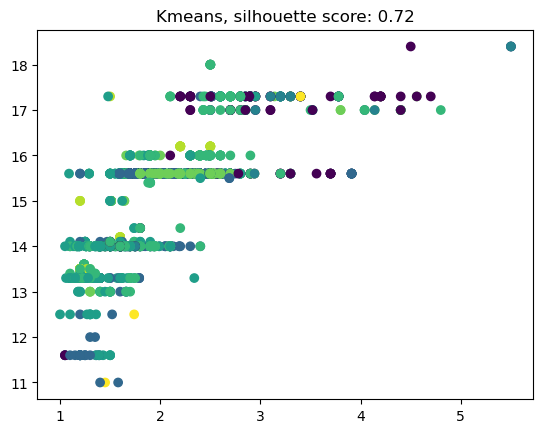

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], c=labels)
plt.title(f'Kmeans, silhouette score: {score:.2f}')
plt.show()


In [18]:
df_train['Predicted_Class'] = labels

C:\Users\IDEH\AppData\Local\Temp\ipykernel_7164\1491322965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Predicted_Class'] = labels


In [19]:
df_train

,Weight,Screen_size,resolution1,resolution2,CPU_Brand,RAM,storage_amount,Storage_type,GPU_Brand,OS,Predicted_Class
0,1.80,15.6,1080.0,1920.0,2,12,524,2,5,2,5
1,1.80,15.6,1080.0,1920.0,2,12,2622,1,5,2,0
2,1.80,15.6,1080.0,1920.0,2,16,2622,1,5,2,0
3,1.80,15.6,1080.0,1920.0,2,8,524,2,5,2,5
4,1.80,15.6,1080.0,1920.0,2,16,524,2,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...
4798,3.10,17.3,1080.0,1920.0,2,64,2000,1,4,6,0
4799,1.94,14.0,1080.0,1920.0,2,8,1000,1,1,2,6
4800,3.10,17.3,1080.0,1920.0,2,32,5244,1,4,6,4
4801,1.90,14.0,1080.0,1920.0,2,8,1000,1,1,2,6


# Classification

In [20]:
df_train

,Weight,Screen_size,resolution1,resolution2,CPU_Brand,RAM,storage_amount,Storage_type,GPU_Brand,OS,Predicted_Class
0,1.80,15.6,1080.0,1920.0,2,12,524,2,5,2,5
1,1.80,15.6,1080.0,1920.0,2,12,2622,1,5,2,0
2,1.80,15.6,1080.0,1920.0,2,16,2622,1,5,2,0
3,1.80,15.6,1080.0,1920.0,2,8,524,2,5,2,5
4,1.80,15.6,1080.0,1920.0,2,16,524,2,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...
4798,3.10,17.3,1080.0,1920.0,2,64,2000,1,4,6,0
4799,1.94,14.0,1080.0,1920.0,2,8,1000,1,1,2,6
4800,3.10,17.3,1080.0,1920.0,2,32,5244,1,4,6,4
4801,1.90,14.0,1080.0,1920.0,2,8,1000,1,1,2,6


In [55]:
df_test=pd.read_csv('ShabeAkhar3.csv')
df_test

,Weight.1,Screen_Size,resolution1,resolution2,CPU.1,RAM,Final_Storage,stor_type,GPU.1,OS
0,0.69,10.1,1920,1200,INTEL,4,64,SSD,Intel,Android
1,0.69,10.1,1920,1200,INTEL,4,64,SSD,Intel,Windows
2,0.81,13.3,1920,1080,INTEL,8,256,SSD,Intel,Windows
3,0.81,13.3,1920,1080,INTEL,16,256,SSD,Intel,Windows
4,0.91,12.5,1920,1080,INTEL,16,512,SSD,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...
920,4.60,17.3,1920,1080,INTEL,16,1128,Hybrid,Nvidia,Windows
921,4.60,17.3,1920,1080,INTEL,16,1256,Hybrid,Nvidia,Windows
922,4.60,17.3,1920,1080,INTEL,32,1256,Hybrid,Nvidia,Windows
923,4.60,17.3,1920,1080,INTEL,32,1512,Hybrid,Nvidia,Windows


In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Weight.1       925 non-null    float64
 1   Screen_Size    925 non-null    float64
 2   resolution1    925 non-null    int64  
 3   resolution2    925 non-null    int64  
 4   CPU.1          925 non-null    object 
 5   RAM            925 non-null    int64  
 6   Final_Storage  925 non-null    int64  
 7   stor_type      925 non-null    object 
 8   GPU.1          925 non-null    object 
 9   OS             925 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 72.4+ KB


In [25]:
df_train.columns

Index(['Weight', 'Screen_size', 'resolution1', 'resolution2', 'CPU_Brand',
       'RAM', 'storage_amount', 'Storage_type', 'GPU_Brand', 'OS',
       'Predicted_Class'],
      dtype='object')

In [56]:
df_test.rename(columns={'Weight.1':'Weight',
                        'Screen_Size':'Screen_size',
                        'CPU.1':'CPU_Brand',
                        'Final_Storage':'storage_amount',
                        'stor_type':'Storage_type',
                        'GPU.1':'GPU_Brand'}, inplace=True)

df_test

,Weight,Screen_size,resolution1,resolution2,CPU_Brand,RAM,storage_amount,Storage_type,GPU_Brand,OS
0,0.69,10.1,1920,1200,INTEL,4,64,SSD,Intel,Android
1,0.69,10.1,1920,1200,INTEL,4,64,SSD,Intel,Windows
2,0.81,13.3,1920,1080,INTEL,8,256,SSD,Intel,Windows
3,0.81,13.3,1920,1080,INTEL,16,256,SSD,Intel,Windows
4,0.91,12.5,1920,1080,INTEL,16,512,SSD,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...
920,4.60,17.3,1920,1080,INTEL,16,1128,Hybrid,Nvidia,Windows
921,4.60,17.3,1920,1080,INTEL,16,1256,Hybrid,Nvidia,Windows
922,4.60,17.3,1920,1080,INTEL,32,1256,Hybrid,Nvidia,Windows
923,4.60,17.3,1920,1080,INTEL,32,1512,Hybrid,Nvidia,Windows


In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Weight          925 non-null    float64
 1   Screen_size     925 non-null    float64
 2   resolution1     925 non-null    int64  
 3   resolution2     925 non-null    int64  
 4   CPU_Brand       925 non-null    object 
 5   RAM             925 non-null    int64  
 6   storage_amount  925 non-null    int64  
 7   Storage_type    925 non-null    object 
 8   GPU_Brand       925 non-null    object 
 9   OS              925 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 72.4+ KB


In [57]:
df_test['Weight']=df_test['Weight'].astype('float64')
df_test['Screen_size']=df_test['Screen_size'].astype('float64')
df_test['resolution1']=df_test['resolution1'].astype('float64')
df_test['resolution2']=df_test['resolution2'].astype('float64')
df_test['RAM']=df_test['RAM'].astype('int64')
df_test['storage_amount']=df_test['storage_amount'].astype('int64')

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4772 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Weight           4772 non-null   float64
 1   Screen_size      4772 non-null   float64
 2   resolution1      4772 non-null   float64
 3   resolution2      4772 non-null   float64
 4   CPU_Brand        4772 non-null   int32  
 5   RAM              4772 non-null   int64  
 6   storage_amount   4772 non-null   int64  
 7   Storage_type     4772 non-null   int32  
 8   GPU_Brand        4772 non-null   int32  
 9   OS               4772 non-null   int32  
 10  Predicted_Class  4772 non-null   int32  
dtypes: float64(4), int32(5), int64(2)
memory usage: 354.2 KB


In [69]:
df_test=df_test[(df_test['CPU_Brand']!='Samsung')&(df_test['OS']!='Android')&(df_test['OS']!='Chrome OS')&(df_test['OS']!='Linux')&(df_test['OS']!='No OS')]

In [71]:
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        le = le_dict[column]
        df_test[column] = le.transform(df_test[column])


In [72]:
X_test

,Weight,Screen_size,resolution1,resolution2,CPU_Brand,RAM,storage_amount,Storage_type,GPU_Brand,OS
794,2.00,15.6,1080.0,1920.0,2,16,524,2,5,2
199,2.30,15.6,1080.0,1920.0,2,32,5121,1,5,2
1849,2.20,15.6,1080.0,1920.0,2,24,1000,2,5,2
33,1.75,15.6,1080.0,1920.0,2,8,2622,1,5,2
179,1.29,15.6,1080.0,1920.0,2,8,1000,2,5,2
...,...,...,...,...,...,...,...,...,...,...
4549,3.78,17.3,1080.0,1920.0,2,32,5121,1,4,2
1212,1.70,15.6,1080.0,1920.0,2,8,262,2,3,1
233,2.20,15.6,1080.0,1920.0,2,16,1312,1,5,2
4018,1.68,14.0,768.0,1366.0,2,8,1000,0,3,2


In [73]:
X=df_train.drop(columns=['Predicted_Class'])

In [74]:
y=df_train['Predicted_Class']

In [75]:
X

,Weight,Screen_size,resolution1,resolution2,CPU_Brand,RAM,storage_amount,Storage_type,GPU_Brand,OS
0,1.80,15.6,1080.0,1920.0,2,12,524,2,5,2
1,1.80,15.6,1080.0,1920.0,2,12,2622,1,5,2
2,1.80,15.6,1080.0,1920.0,2,16,2622,1,5,2
3,1.80,15.6,1080.0,1920.0,2,8,524,2,5,2
4,1.80,15.6,1080.0,1920.0,2,16,524,2,5,2
...,...,...,...,...,...,...,...,...,...,...
4798,3.10,17.3,1080.0,1920.0,2,64,2000,1,4,6
4799,1.94,14.0,1080.0,1920.0,2,8,1000,1,1,2
4800,3.10,17.3,1080.0,1920.0,2,32,5244,1,4,6
4801,1.90,14.0,1080.0,1920.0,2,8,1000,1,1,2


In [76]:
y

0       5
1       0
2       0
3       5
4       5
       ..
4798    0
4799    6
4800    4
4801    6
4802    6
Name: Predicted_Class, Length: 4772, dtype: int32

# Model

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

clf = RandomForestClassifier(n_estimators=15, random_state=42)

clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.997907949790795


Classifying our laptops

In [78]:
classes=clf.predict(df_test)
df_test['Pred_Class']=classes

In [79]:
df_test

,Weight,Screen_size,resolution1,resolution2,CPU_Brand,RAM,storage_amount,Storage_type,GPU_Brand,OS,Pred_Class
1,0.69,10.1,1920.0,1200.0,2,4,64,2,3,6,5
2,0.81,13.3,1920.0,1080.0,2,8,256,2,3,6,5
3,0.81,13.3,1920.0,1080.0,2,16,256,2,3,6,8
4,0.91,12.5,1920.0,1080.0,2,16,512,2,3,6,8
5,0.92,12.0,2304.0,1440.0,2,8,256,2,3,2,8
...,...,...,...,...,...,...,...,...,...,...,...
920,4.60,17.3,1920.0,1080.0,2,16,1128,1,4,6,6
921,4.60,17.3,1920.0,1080.0,2,16,1256,1,4,6,6
922,4.60,17.3,1920.0,1080.0,2,32,1256,1,4,6,6
923,4.60,17.3,1920.0,1080.0,2,32,1512,1,4,6,6


In [80]:
df_test.to_csv('Sales_ShabeAkhar.csv')

In [81]:
df_train.to_csv('Scrape_ShabeAkhar.csv')